In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR

In [25]:
dataset_path = '../../dataset/google_review_ratings.csv'  
data = pd.read_csv(dataset_path)

In [26]:
data

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [27]:
data.shape

(5456, 26)

In [28]:
# Konvertovanje svih kolona sa ocenama u numeričke vrednosti (float)
rating_columns = data.columns[1:]
data[rating_columns] = data[rating_columns].apply(pd.to_numeric, errors='coerce')

print(data[rating_columns].dtypes)

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object


In [29]:
#Drop-ujem kolone User i Unnamed
data = data.drop('User', axis=1) 
data = data.drop('Unnamed: 25', axis = 1)

In [30]:
#preimenovanje kolona
new_column_names = {
    'Category 1': 'AverageRatingsChurches',
    'Category 2': 'AverageRatingsResorts',
    'Category 3': 'AverageRatingsBeaches',
    'Category 4': 'AverageRatingsParks',
    'Category 5': 'AverageRatingsTheatres',
    'Category 6': 'AverageRatingsMuseums',
    'Category 7': 'AverageRatingsMalls',
    'Category 8': 'AverageRatingsZoo',
    'Category 9': 'AverageRatingsRestaurants',
    'Category 10': 'AverageRatingsPubsBars',
    'Category 11': 'AverageRatingsLocalServices',
    'Category 12': 'AverageRatingsBurgerPizzaShops',
    'Category 13': 'AverageRatingsHotelsLodgings',
    'Category 14': 'AverageRatingsJuiceBars',
    'Category 15': 'AverageRatingsArtGalleries',
    'Category 16': 'AverageRatingsDanceClubs',
    'Category 17': 'AverageRatingsSwimmingPools',
    'Category 18': 'AverageRatingsGyms',
    'Category 19': 'AverageRatingsBakeries',
    'Category 20': 'AverageRatingsBeautySpas',
    'Category 21': 'AverageRatingsCafes',
    'Category 22': 'AverageRatingsViewPoints',
    'Category 23': 'AverageRatingsMonuments',
    'Category 24': 'AverageRatingsGardens'
}

data.rename(columns=new_column_names, inplace=True)

print(data.columns)

Index(['AverageRatingsChurches', 'AverageRatingsResorts',
       'AverageRatingsBeaches', 'AverageRatingsParks',
       'AverageRatingsTheatres', 'AverageRatingsMuseums',
       'AverageRatingsMalls', 'AverageRatingsZoo', 'AverageRatingsRestaurants',
       'AverageRatingsPubsBars', 'AverageRatingsLocalServices',
       'AverageRatingsBurgerPizzaShops', 'AverageRatingsHotelsLodgings',
       'AverageRatingsJuiceBars', 'AverageRatingsArtGalleries',
       'AverageRatingsDanceClubs', 'AverageRatingsSwimmingPools',
       'AverageRatingsGyms', 'AverageRatingsBakeries',
       'AverageRatingsBeautySpas', 'AverageRatingsCafes',
       'AverageRatingsViewPoints', 'AverageRatingsMonuments',
       'AverageRatingsGardens'],
      dtype='object')


In [31]:
# Statističke informacije o numeričkim kolonama
data.describe()

,AverageRatingsChurches,AverageRatingsResorts,AverageRatingsBeaches,AverageRatingsParks,AverageRatingsTheatres,AverageRatingsMuseums,AverageRatingsMalls,AverageRatingsZoo,AverageRatingsRestaurants,AverageRatingsPubsBars,...,AverageRatingsArtGalleries,AverageRatingsDanceClubs,AverageRatingsSwimmingPools,AverageRatingsGyms,AverageRatingsBakeries,AverageRatingsBeautySpas,AverageRatingsCafes,AverageRatingsViewPoints,AverageRatingsMonuments,AverageRatingsGardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [32]:
#provera NaN vrednosti
nan_check = data.isna().sum()

In [33]:
data = data.fillna(data.mean())

In [34]:
data

,AverageRatingsChurches,AverageRatingsResorts,AverageRatingsBeaches,AverageRatingsParks,AverageRatingsTheatres,AverageRatingsMuseums,AverageRatingsMalls,AverageRatingsZoo,AverageRatingsRestaurants,AverageRatingsPubsBars,...,AverageRatingsArtGalleries,AverageRatingsDanceClubs,AverageRatingsSwimmingPools,AverageRatingsGyms,AverageRatingsBakeries,AverageRatingsBeautySpas,AverageRatingsCafes,AverageRatingsViewPoints,AverageRatingsMonuments,AverageRatingsGardens
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


# Linearna regresija

Pokusacemo da vidimo da li ova kolona moze da se predvidi na osnovu podataka iz svih ostalih kolona.

In [35]:
# Definisanje ciljnog atributa i atributa za ulaz
target_column = 'AverageRatingsChurches'  # Primer: prosečne ocene crkava
X = data.drop(target_column, axis=1)
y = data[target_column]

In [36]:
# Podela podataka na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Kreiranje i treniranje modela linearne regresije
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predviđanje na test skupu
y_pred = regression_model.predict(X_test)

In [39]:
# Evaluacija modela
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)

In [40]:
print(f'Srednja kvadratna greška (MSE): {mse}')
print(f'R kvadrat (R^2): {r2}')

Srednja kvadratna greška (MSE): 0.4384709438423627
R kvadrat (R^2): 0.37125171452459405


   Srednja kvadratna greška (MSE) meri prosečnu kvadratnu grešku između stvarnih vrednosti i predviđenih vrednosti. U ovom slučaju, MSE iznosi 0.438, što znači da su prosečne kvadratne greške relativno niske. Niža vrednost MSE ukazuje na bolju preciznost modela.
    
   R kvadrat (R^2) meri koliko dobro model objašnjava varijansu u podacima. Vrednost R^2 kreće se od 0 do 1, gde 0 ukazuje na to da model ne objašnjava ništa od varijanse u podacima, a 1 ukazuje na to da model savršeno objašnjava varijansu. R^2 iznosi 0.371, što znači da model objašnjava 37.1% varijanse u prosečnim ocenama crkava.


Probacemo i za kolonu AverageRatingsParks:

In [41]:
target_column = 'AverageRatingsParks'  # Primer: prosečne ocene parkova
X = data.drop(target_column, axis=1)
y = data[target_column]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Kreiranje i treniranje modela linearne regresije
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predviđanje na test skupu
y_pred = regression_model.predict(X_test)
# Evaluacija modela
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)

In [45]:
regression_model.coef_

array([-0.09345577,  0.04528982,  0.1664268 ,  0.44118656,  0.05933591,
       -0.04826271, -0.11998854,  0.02944347, -0.01073386, -0.02430808,
       -0.00459313,  0.02633891, -0.07392021, -0.02435424,  0.07503284,
       -0.04442192, -0.03357244, -0.04839028, -0.01581628, -0.10931967,
        0.15090767,  0.03183558, -0.02745562])

In [46]:
print(f'Srednja kvadratna greška (MSE): {mse}')
print(f'R kvadrat (R^2): {r2}')

Srednja kvadratna greška (MSE): 0.8785481610202787
R kvadrat (R^2): 0.4981994384564413


Vizualizacija rezultata linearne regresije, uključujući grafikone stvarnih vs. predviđenih vrednosti i grafikone reziduala.

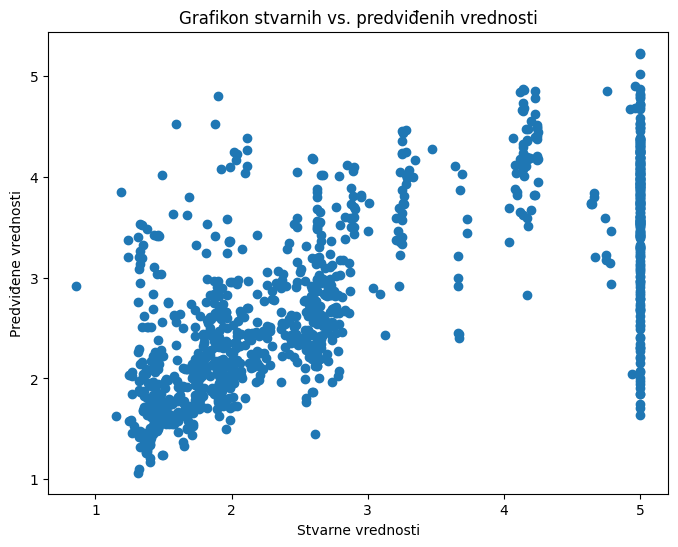

In [59]:
# Grafikon stvarnih vs. predviđenih vrednosti
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Stvarne vrednosti")
plt.ylabel("Predviđene vrednosti")
plt.title("Grafikon stvarnih vs. predviđenih vrednosti")
plt.show()

Grafikon prikazuje tačke u obliku rasipanja gde x-osa predstavlja stvarne vrednosti, a y-osa predviđene vrednosti. Idealno, tačke bi trebalo da se nalaze duž dijagonale, što znači da su stvarne i predviđene vrednosti skoro identične.

In [61]:
# Računanje reziduala
residuals = y_test - y_pred #Reziduali su razlika između stvarnih vrednosti i vrednosti koje je model predvideo tj. to su greške koje model pravi u svojim predviđanjima.

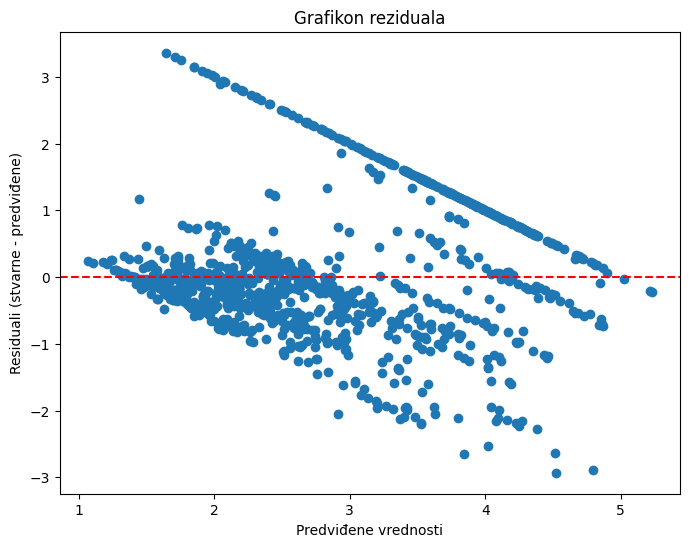

In [62]:
# Grafikon reziduala
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predviđene vrednosti")
plt.ylabel("Residuali (stvarne - predviđene)")
plt.title("Grafikon reziduala")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Drugi grafikon prikazuje rezidualne greške u odnosu na predviđene vrednosti. Linija na y=0 je horizontalna crvena linija koja predstavlja nulu reziduala.
Ako reziduali leže oko horizontalne crvene linije na nuli (koja predstavlja nulu greške), to ukazuje na dobro kalibrisan model.

Posto smo gore primenili isti model na dve razlicite kolone , sad cemo primeniti drugi model -> SVM.
SVM se takođe može koristiti za regresiju, posebno za probleme regresije sa podrškom vektorima (SVR).

In [47]:
# Izbor ciljnog atributa (npr. prosečne ocene crkava jer je za tu kolonu dobijena manja greska nego kada smo upotrebili kolonu AverageRatingsParks)
target_column_2 = 'AverageRatingsChurches'

In [50]:
# Podela podataka na trening i test skup
X_2 = data.drop(target_column_2, axis=1)
y_2 = data[target_column_2]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [51]:
# Kreiranje i treniranje SVM modela za regresiju (SVR)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_2, y_train_2)

SVR()

In [52]:
# Predviđanje na test skupu koristeći SVM model
svm_y_pred = svm_model.predict(X_test_2)

In [53]:
# Evaluacija SVM modela
svm_mse = mean_squared_error(y_test_2, svm_y_pred)
svm_r2 = r2_score(y_test_2, svm_y_pred)


In [54]:
print(f'SVM Model - Srednja kvadratna greška (MSE): {svm_mse}')
print(f'SVM Model - R kvadrat (R^2): {svm_r2}')

SVM Model - Srednja kvadratna greška (MSE): 0.3392596714148109
SVM Model - R kvadrat (R^2): 0.5135163692632279


   Srednja kvadratna greška (MSE) iznosi 0.339, što ukazuje na prosečnu kvadratnu razliku između stvarnih vrednosti i predviđenih vrednosti. Niža vrednost MSE je bolja, pa manja vrednost ukazuje na bolju preciznost modela.

   R kvadrat (R^2) iznosi 0.514, što znači da ovaj SVM model objašnjava oko 51.4% varijacije u prosečnim ocenama crkava. R^2 vrednost od 1 bi značila savršeno objašnjenje varijanse, dok vrednost od 0 znači da model ne objašnjava ništa. Dakle, ovaj model objašnjava veći deo varijanse u ciljnom atributu, što je dobar rezultat.

Iz ovih rezultata možemo zaključiti da SVM model (koristeći jezgro 'rbf') daje bolje performanse za predviđanje prosečnih ocena crkava u odnosu na model linearne regresije za ovaj dataset i ciljni atribut.

# Grafikoni stvarnih vs. predviđenih vrednosti i grafikoni reziduala za SVM model

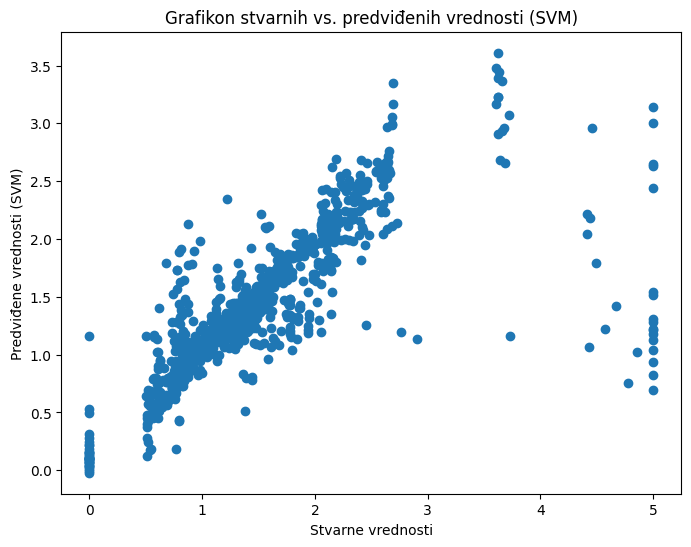

In [63]:
# Grafikon stvarnih vs. predviđenih vrednosti za SVM
plt.figure(figsize=(8, 6))
plt.scatter(y_test_2, svm_y_pred)
plt.xlabel("Stvarne vrednosti")
plt.ylabel("Predviđene vrednosti (SVM)")
plt.title("Grafikon stvarnih vs. predviđenih vrednosti (SVM)")
plt.show()

In [64]:
# Računanje reziduala za SVM
svm_residuals = y_test_2 - svm_y_pred

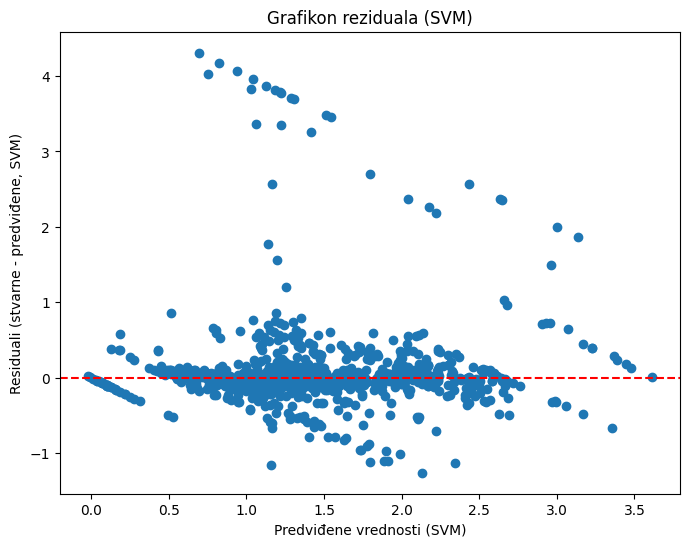

In [66]:
# Grafikon reziduala za SVM
plt.figure(figsize=(8, 6))
plt.scatter(svm_y_pred, svm_residuals)
plt.xlabel("Predviđene vrednosti (SVM)")
plt.ylabel("Residuali (stvarne - predviđene, SVM)")
plt.title("Grafikon reziduala (SVM)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Zaključak: SVM regresija (koristeći jezgro 'rbf') daje bolje performanse za predviđanje određenih ciljnih atributa u poređenju sa linearnom regresijom